In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import time

In [2]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.2 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 888.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 927.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 967.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 463.2 kB/s eta 0:00:000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 878.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 764.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 287.7 kB/s eta 0:00:00 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110685 sha256=7f4d48ce7ca7ff685c257ff9b890809152bdca84f29de3d5ac9d3ca5a4e71645
  Stored in directory: /home/u197692/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  akshaybr


Your Kaggle Key:

  ································


100%|██████████| 86.8M/86.8M [00:24<00:00, 3.73MB/s]


In [1]:
# Define the paths to your data
data_dir = 'brain-tumor-classification-mri/Training'
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


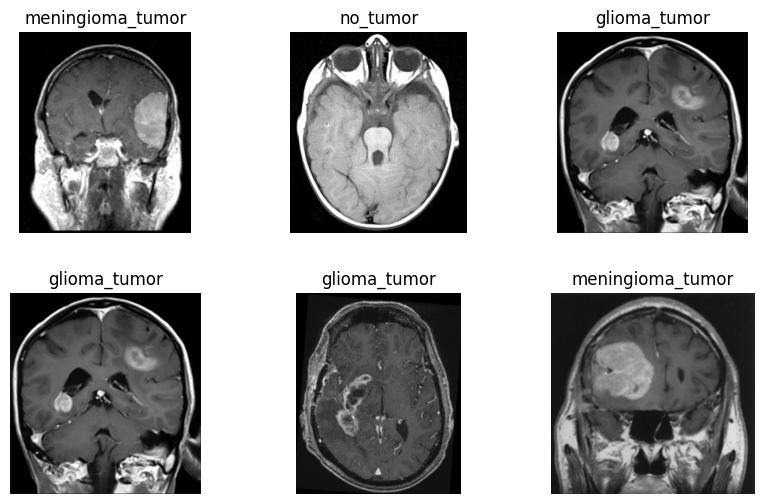

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
main_folder = 'brain-tumor-classification-mri/Testing'
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
for ax in axes.ravel():
    class_label = random.choice(class_labels)
    class_folder = os.path.join(main_folder, class_label)
    image_files = os.listdir(class_folder)
    random_image = random.choice(image_files)
    image_path = os.path.join(class_folder, random_image)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(class_label)
    ax.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


In [4]:

# Set hyperparameters
batch_size = 32
epochs = 20




In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # VGG16 and ResNet50 input size
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




2023-09-14 06:57:47.550313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 06:57:49.703597: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 06:57:49.712049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 06:58:07.266433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [9]:
# Create and compile InceptionV3 model
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_inceptionv3 = Sequential([
    base_model_inceptionv3,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_inceptionv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 21s 0us/step


In [10]:

# Create and compile DenseNet121 model
base_model_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_densenet121 = Sequential([
    base_model_densenet121,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_densenet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 [==============================] - 7s 0us/step


In [11]:
# Create and compile VGG16 model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg16 = Sequential([
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





58889256/58889256 [==============================] - 14s 0us/step


In [12]:
# Create and compile ResNet50 model
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet50 = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



94765736/94765736 [==============================] - 23s 0us/step


In [13]:

# Function to train and measure time for a model
def train_and_measure_time(model, train_generator, validation_generator, epochs):
    for epoch in range(epochs):
        start_time = time.time()  # Record the start time for the epoch
        history = model.fit(train_generator, epochs=1, validation_data=validation_generator)
        end_time = time.time()  # Record the end time for the epoch
        epoch_runtime = end_time - start_time  # Calculate epoch runtime
        print(f"Epoch {epoch + 1} - Runtime: {epoch_runtime:.2f} seconds")


In [ ]:
# Train the models and measure runtime
train_and_measure_time(model_vgg16, train_generator, validation_generator, epochs)
train_and_measure_time(model_resnet50, train_generator, validation_generator, epochs)
train_and_measure_time(model_inceptionv3, train_generator, validation_generator, epochs)
train_and_measure_time(model_densenet121, train_generator, validation_generator, epochs)

72/72 [==============================] - 526s 7s/step - loss: 1.4525 - accuracy: 0.2912 - val_loss: 1.3520 - val_accuracy: 0.2880
Epoch 1 - Runtime: 528.06 seconds
72/72 [==============================] - 496s 7s/step - loss: 1.3587 - accuracy: 0.2934 - val_loss: 1.3547 - val_accuracy: 0.2880
Epoch 2 - Runtime: 496.26 seconds
72/72 [==============================] - 499s 7s/step - loss: 1.3422 - accuracy: 0.2947 - val_loss: 1.3113 - val_accuracy: 0.3752
Epoch 3 - Runtime: 499.07 seconds
72/72 [==============================] - 500s 7s/step - loss: 1.3395 - accuracy: 0.3248 - val_loss: 1.3531 - val_accuracy: 0.2880
Epoch 4 - Runtime: 499.99 seconds
41/72 [================>.............] - ETA: 3:18 - loss: 1.3451 - accuracy: 0.2805

In [ ]:
# Train the models
history_vgg16 = model_vgg16.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
72/72 [==============================] - 53s 659ms/step - loss: 1.4903 - accuracy: 0.2978 - val_loss: 1.3426 - val_accuracy: 0.3717
Epoch 2/20
72/72 [==============================] - 47s 654ms/step - loss: 1.2980 - accuracy: 0.3670 - val_loss: 1.3093 - val_accuracy: 0.3089
Epoch 3/20
72/72 [==============================] - 50s 695ms/step - loss: 1.2520 - accuracy: 0.4014 - val_loss: 1.2568 - val_accuracy: 0.4084
Epoch 4/20
72/72 [==============================] - 46s 634ms/step - loss: 1.2422 - accuracy: 0.4079 - val_loss: 1.2399 - val_accuracy: 0.4241
Epoch 5/20
72/72 [==============================] - 47s 646ms/step - loss: 1.1591 - accuracy: 0.4528 - val_loss: 1.2162 - val_accuracy: 0.4695
Epoch 6/20
72/72 [==============================] - 48s 661ms/step - loss: 1.1288 - accuracy: 0.4819 - val_loss: 1.2811 - val_accuracy: 0.3997
Epoch 7/20
72/72 [==============================] - 46s 632ms/step - loss: 1.1040 - accuracy: 0.5024 - val_loss: 1.2712 - val_accuracy: 0.5026

In [ ]:
history_resnet50 = model_resnet50.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/20
72/72 [==============================] - 83s 649ms/step - loss: 0.9632 - accuracy: 0.6613 - val_loss: 38.1912 - val_accuracy: 0.2880
Epoch 2/20
72/72 [==============================] - 49s 680ms/step - loss: 0.5385 - accuracy: 0.7980 - val_loss: 4.4422 - val_accuracy: 0.2862
Epoch 3/20
72/72 [==============================] - 44s 612ms/step - loss: 0.4142 - accuracy: 0.8463 - val_loss: 4.4865 - val_accuracy: 0.1379
Epoch 4/20
72/72 [==============================] - 45s 629ms/step - loss: 0.3277 - accuracy: 0.8872 - val_loss: 4.9291 - val_accuracy: 0.1379
Epoch 5/20
72/72 [==============================] - 47s 659ms/step - loss: 0.2744 - accuracy: 0.9121 - val_loss: 8.3081 - val_accuracy: 0.1379
Epoch 6/20
72/72 [==============================] - 45s 627ms/step - loss: 0.2740 - accuracy: 0.9081 - val_loss: 2.9952 - val_accuracy: 0.1379
Epoch 7/20
72/72 [==============================] - 44s 609ms/step - loss: 0.2570 - accuracy: 0.9055 - val_loss: 8.9786 - val_accuracy: 0.137

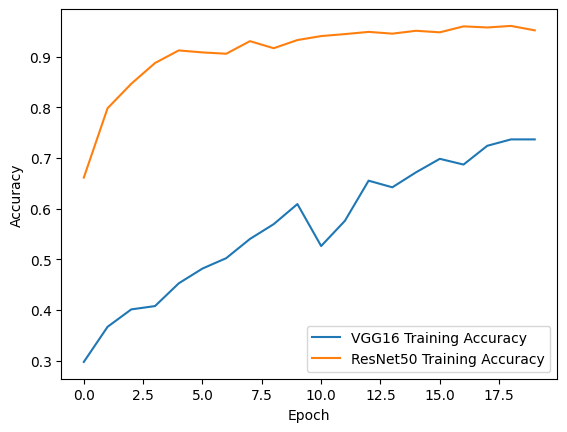

In [ ]:
# Plot training accuracy
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()